<a href="https://colab.research.google.com/github/Anyaoma/My-projects/blob/main/Linkedin_Linear_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTION:

1. HOW DOES APPLE, GOOGLE, MICROSOFT AND DOW JONES, IMPACT META



In [ ]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime
import pandas_datareader.data as web
import yfinance as yfin

yfin.pdr_override()

plt.rcParams["figure.figsize"] = (12, 9)

In [ ]:
#START AND END DATE OF REQUIRED DATA
end_date = datetime.date(2024,1,31)
start_date = datetime.date(2014,1,10)

In [ ]:
#DOWNLOAD DATASETS
data = pd.DataFrame(web.DataReader(['META','AAPL','GOOG','MSFT','^DJI'], start_date, end_date, interval= '1mo')['Adj Close'])
data.head()

[*********************100%%**********************]  5 of 5 completed


Ticker,AAPL,GOOG,META,MSFT,^DJI
Date,,,,,
2014-02-01,16.455795,30.277761,68.387436,32.199646,16321.709961
2014-03-01,16.884602,27.772251,60.176155,34.710545,16457.660156
2014-04-01,18.562868,26.260900,59.716640,34.210922,16580.839844
2014-05-01,19.912718,27.917852,63.232906,34.668186,16717.169922
2014-06-01,20.577837,28.685246,67.218681,35.560883,16826.599609


In [ ]:
data_r = data.pct_change()
data_r = data_r.rename(columns={"^DJI": "DJI"})
data_r= data_r.dropna()
data_r.reset_index(inplace=True)
data_r.head()

Ticker,Date,AAPL,GOOG,META,MSFT,DJI
0,2014-03-01,0.026058,-0.082751,-0.120070,0.077979,0.008329
1,2014-04-01,0.099396,-0.054419,-0.007636,-0.014394,0.007485
2,2014-05-01,0.072718,0.063096,0.058883,0.013366,0.008222
3,2014-06-01,0.033402,0.027488,0.063033,0.025750,0.006546
4,2014-07-01,0.028731,-0.006397,0.079655,0.035012,-0.015648


In [ ]:
data.columns

Index(['AAPL', 'GOOG', 'META', 'MSFT', '^DJI'], dtype='object', name='Ticker')

Deploy the use of scatter plot to visualize the relationship between the dependent and independent variables. The reasons for this inlude:


1.   To check if a linear relationship exists between the response and the predictor variables. (An assumption for a linear estimator). Moreover, the check involves detecting if there are any non-linear deviations from the linear relationsips (if they exist)
2.   To check if the the response and the predictor variables are independent of each other. This is signified by horizontal or vertical lines in the scatter plot
3.   To check for the presence of extreme points; outliers or leverage points.
outliers are datapoints that do not follow the general trends of other points, while leverage points are extreme values in the predictor variables.



In [ ]:
def corr(x, y, **kwargs):
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r"$\rho$ = " + str(round(coef, 2))

    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy=(0.3, 0.15), size=20, xycoords=ax.transAxes)

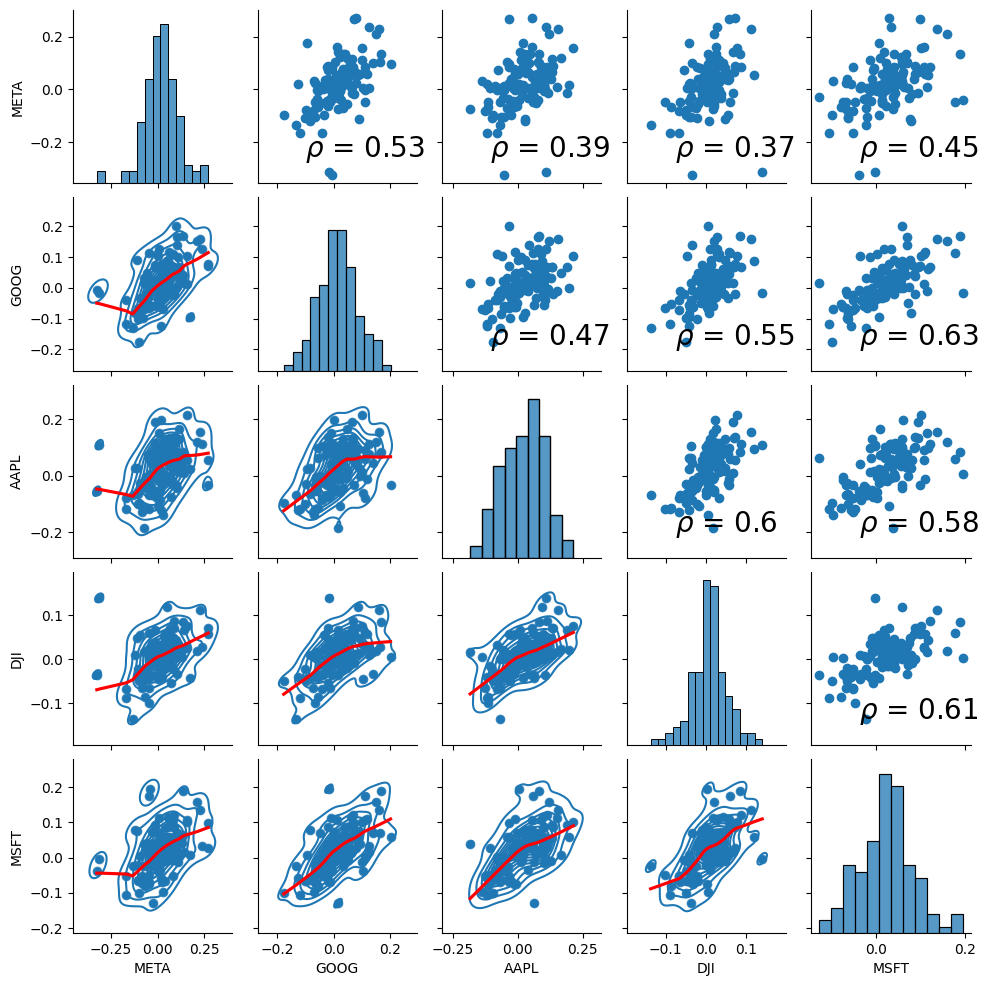

In [ ]:
# Create the default pairplot
matrix_grid = sns.pairplot(data_r, vars=["META", "GOOG", "AAPL", "DJI","MSFT"], height=2)

# Map a scatter plot and Pearson correlation coefficient to the upper triangle
matrix_grid = matrix_grid.map_upper(plt.scatter)
matrix_grid = matrix_grid.map_upper(corr)

# Map a histogram to the diagonal
# grid = grid.map_diag(plt.hist)

# Map a density plot and regression line to the lower triangle
matrix_grid = matrix_grid.map_lower(sns.kdeplot)
matrix_grid = matrix_grid.map_lower(sns.regplot, lowess=True, line_kws={"color": "red"})

From the graphics above, Meta has a weak positive relationship with all four stocks - GOOG, AAPL, DJI and MSFT, since their correlation levels is below .60. Their scatter plot form an oval shape, more or less. And the red lines are somewhat tilted upwards. However, all four red lines are not straight and entirely upward sloping. The scatter plot doesnt show any non linear deviations from the linear relationship observed.

# MODEL ESTIMATION

In [ ]:
# Linear regression result
result = smf.ols("META ~ AAPL + GOOG + DJI + MSFT", data=data_r).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   META   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     12.91
Date:                Wed, 01 May 2024   Prob (F-statistic):           1.06e-08
Time:                        02:20:38   Log-Likelihood:                 134.28
No. Observations:                 119   AIC:                            -258.6
Df Residuals:                     114   BIC:                            -244.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0028      0.008      0.352      0.725      -0.013       0.018
AAPL           0.1681      0.123      1.371      0.173      -0.075       0.411
GOOG           0.5227      0.145      3.614      0.000       0.236       0.809
DJI            0.0112      0.236      0.047      0.962      -0.457       0.479
MSFT           0.1909      0.174      1.095      0.276      -0.154       0.536
==============================================================================
Omnibus:                       24.847   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.030
Skew:                          -0.617   Prob(JB):                     7.67e-20
Kurtosis:                       7.029   Cond. No.                         33.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# MODEL DIAGNOSTICS

Based on the OLS model result, the p values of the model estimates shows that GOOG returns exhibit a linear relationship with that of META. The null hypothesis of no correlation cannot be rejected for AAPL, DJI, and MSFT, seeing that their p values are greater than 0.05 and therefore statistically insignificant.

The above result do not necessarily imply the absence of a relationship between META (response) and AAPL, DJI and MSFT (predictors), rather, these particular predictors are not useful in predicting the response when the predictor - GOOG is included in the regression model. Stated differently, we can accept the null hypothesis that conditional on GOOG, AAPL, MSFT, DJI and META are not linearly related. In order words, AAPL, MSFT, and DJI are not useful for predicting META when GOOG is included in the regression model.

This is evidenced in the OLS regression between META and individual predictors below. These results show that a linear relationship exists and also significant, individually.

Finally, a high p value only indicates the absence of a linear relationship. Sometimes non linear relationships like quadratic, exponential or logarithmic relationship might exist, leading to non linear deviations from the assumed linear relationship.

In [ ]:
result_A = smf.ols("META ~ AAPL", data=data_r).fit()
result_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   META   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     21.43
Date:                Wed, 01 May 2024   Prob (F-statistic):           9.57e-06
Time:                        02:20:38   Log-Likelihood:                 122.05
No. Observations:                 119   AIC:                            -240.1
Df Residuals:                     117   BIC:                            -234.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0082      0.008      0.985      0.327      -0.008       0.025
AAPL           0.4679      0.101      4.629      0.000       0.268       0.668
==============================================================================
Omnibus:                       19.892   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.479
Skew:                          -0.461   Prob(JB):                     6.05e-15
Kurtosis:                       6.515   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
result_M = smf.ols("META ~ MSFT", data=data_r).fit()
result_M.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   META   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     29.28
Date:                Wed, 01 May 2024   Prob (F-statistic):           3.38e-07
Time:                        02:20:38   Log-Likelihood:                 125.33
No. Observations:                 119   AIC:                            -246.7
Df Residuals:                     117   BIC:                            -241.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0034      0.008      0.405      0.686      -0.013       0.020
MSFT           0.6868      0.127      5.411      0.000       0.435       0.938
==============================================================================
Omnibus:                       16.692   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.996
Skew:                          -0.525   Prob(JB):                     1.53e-08
Kurtosis:                       5.481   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
result_D = smf.ols("META ~ DJI", data=data_r).fit()
result_D.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   META   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     19.09
Date:                Wed, 01 May 2024   Prob (F-statistic):           2.71e-05
Time:                        02:20:38   Log-Likelihood:                 121.04
No. Observations:                 119   AIC:                            -238.1
Df Residuals:                     117   BIC:                            -232.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0127      0.008      1.544      0.125      -0.004       0.029
DJI            0.8131      0.186      4.369      0.000       0.445       1.182
==============================================================================
Omnibus:                       39.515   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.058
Skew:                          -1.035   Prob(JB):                     3.21e-37
Kurtosis:                       8.441   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
result_G = smf.ols("META ~ GOOG", data=data_r).fit()
result_G.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   META   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     44.65
Date:                Wed, 01 May 2024   Prob (F-statistic):           8.41e-10
Time:                        02:20:38   Log-Likelihood:                 131.28
No. Observations:                 119   AIC:                            -258.6
Df Residuals:                     117   BIC:                            -253.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0081      0.008      1.069      0.287      -0.007       0.023
GOOG           0.7270      0.109      6.682      0.000       0.512       0.942
==============================================================================
Omnibus:                       22.865   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.457
Skew:                          -0.593   Prob(JB):                     1.85e-16
Kurtosis:                       6.634   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# RSQUARED

In our model, the  𝑅2
  is 0.312. It means that the change in GOOG return, DJI return, AAPL return and MSFT return together can explain 31.2% of the change in META return.



In [ ]:
result.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,0.002785,0.007903,0.352473,0.725134,-0.012870,0.018440
AAPL,0.168091,0.122607,1.370969,0.173078,-0.074793,0.410974
GOOG,0.522654,0.144627,3.613805,0.000450,0.236149,0.809160
DJI,0.011215,0.236125,0.047495,0.962202,-0.456547,0.478977
MSFT,0.190940,0.174355,1.095123,0.275771,-0.154456,0.536337


The result from the regression means, when GOOG return increases by 0.01 (1%), META's return will increase by 0.00522654 (0.522654%).

# OUTLIERS AND INFLUENCE

Here, we try to observe if there are any influential points (extreme points) in the data set is likely to impact or change slope of the regression line. This can be determined by calculating COOK'S Distance. This measures the influence a data point has on the model, by determining how much the model change if the ith observation is deleted. a data point with Cook D's value greater than 1 is considered an influential point.

A high-leverage value or a large absolute externally studentized residual
indicates only a potential problem with a data point.

1. High-leverage values: These are calculated based on the predictor variables (exogenous variables) in the model. High-leverage points are data points with unusual combinations of predictor variable values that can exert a strong influence on the estimated regression coefficients. In regression analysis, leverage refers to the potential impact of a data point on the estimated regression line. High leverage means that a data point has a relatively large influence on the fitted regression model. However, having high leverage alone doesn't necessarily indicate a problem; it just means the data point has the potential to strongly influence the regression line.

2. Externally studentized residuals: Residuals are calculated based on the observed values of the dependent variable (endogenous variable) and the predicted values from the regression model. Externally studentized residuals are then calculated by dividing each residual by an estimate of its standard deviation, which typically involves both the observed values of the dependent variable and the predictor variables in the model.

Neither of the above tells how much influence the data point actually has on the estimates, nor do they alone measure influence.

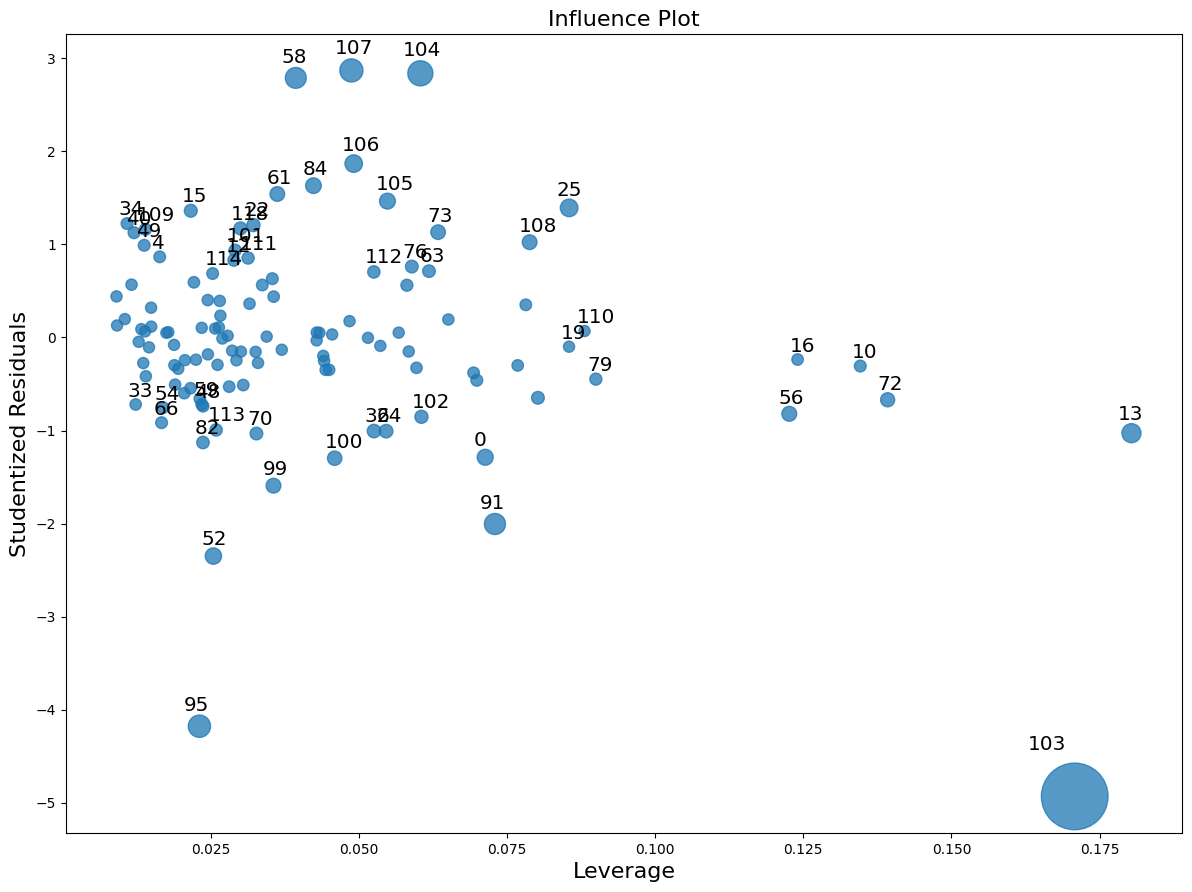

In [ ]:
# Influence plot
fig = sm.graphics.influence_plot(result, criterion="cooks", alpha=0.5)
fig.tight_layout(pad=1.0)

On the X-axis is the Leverage, which measures the difference between the exogenous values of a data point and the mean of exogenous values in the dataset. On the Y-axis of the plot is studentized residuals.The bubbles in the plot indicate the size of the Cook's D for each point. The bigger the bubble, the higher the Cook's D for a data point.

In [ ]:
# Finding most influential points
influence = result.get_influence()
inf_sum = influence.summary_frame().sort_values("cooks_d", ascending=False)
inf_sum.head(30)

,dfb_Intercept,dfb_AAPL,dfb_GOOG,dfb_DJI,dfb_MSFT,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
103,-0.625654,-0.076481,0.719813,-2.000842,0.929112,0.832454,-4.495063,0.170810,-2.040165,-4.933856,-2.239319
104,0.206798,-0.565619,0.019040,0.317636,0.327421,0.097583,2.755945,0.060362,0.698509,2.840071,0.719832
107,0.233186,0.215077,-0.444734,-0.264232,0.249146,0.079419,2.784284,0.048727,0.630155,2.871395,0.649870
95,-0.506203,0.148663,-0.234544,0.173665,0.226805,0.072073,-3.906357,0.023071,-0.600303,-4.178917,-0.642188
91,-0.032409,0.215621,-0.001730,-0.003789,-0.434856,0.061641,-1.979048,0.072950,-0.555161,-2.005094,-0.562467
58,0.267625,-0.082244,0.174140,0.401485,-0.276640,0.060208,2.711351,0.039339,0.548671,2.790920,0.564773
13,0.001197,0.140308,0.235324,0.098894,-0.468109,0.046553,-1.028392,0.180389,-0.482458,-1.028654,-0.482581
25,0.252932,-0.239197,-0.040237,0.267425,-0.185424,0.035993,1.387642,0.085474,0.424225,1.393360,0.425973
106,0.136303,0.177053,0.320230,-0.077248,-0.213966,0.035327,1.849294,0.049113,0.420282,1.869419,0.424856
52,-0.163901,0.179142,-0.148610,-0.121206,-0.064672,0.027708,-2.304260,0.025429,-0.372211,-2.349499,-0.379518


From the influence plot, we can see that Points 103, 104 and 107 have the highest Cook's D sizes. Among the points, non is greater than 1, hence there are no influential points within the data.

# NEXT STEP

The Rsquared suggests that the combination of the predictor variables; AAPL, MSFT, and DJI accounts for only 31.2% of variance in META, which isnt good enough.

Since individual regression results between each predictor variable and the response variable proves that linear relationships exists, we can rule out the issue of nonlinear deviations from linear relationships between META (response) and AAPL, DJI and MSFT.


However, the issue of multicollinearity arises when the predictor variables are correlated with each other. In such situation, the predictor variable that has the highest correlation with the response variable will absorb all the explanatory ability from other correlated exogenous variables, making other correlated exogenous variables not significant in the model.

The scatter plots from the pair plot does indeed indicate that multicolleration exists between the predictors.